In [1]:
# 决策树生成过程：
# 1. 特征选择
# 2. 决策树生成
# 3. 剪枝：预剪枝，后剪枝


# 核心就是特征选择，基于信息论的决策树算法有三种：ID3， CART， C4.5，其中CART和C4.5是从ID3中衍生而来
# 1. ID3：每次选择信息增益最大的特征，没有剪枝的过程，为了去除数据过度匹配，可以通过裁减合并
#         相邻的无法产生大量信息增益的叶子节点（例如，设置信息增益阈值）
#         缺点：偏向具有大量取值的特征，也就是说某个特征所取值个数越多，则越有可能被作为分裂节点；
#              ID3不能处理连续分布的特征；
#              不能处理缺失值；
            
# 2. C4.5：每次选择信息增益率最大的特征，克服用信息增益选择特征时偏向取值多的特征的不足;
#          在树的构造过程中进行剪枝;能够对连续属性进行离散化处理；能够对缺失值进行处理；
#          缺点：效率低，因为在树的构造过程中，需要对数据集进行多次扫描和排序，只适合能够驻留内存的数据集；

# 3. CART：每次选择Gini指数最小的特征，包含后剪枝的操作；
#          ID3和C4.5生成的是多叉树，离散特征只会参与一次节点的建设
#          而CART(Classification and Regression Tree)生成的是简洁的二叉树；特征可参与多次节点的建设；

#    CART回归树：熵，Gini指数都是针对类别数据；而连续数据，可以采用平方误差，即采用最小二乘法;
#            计算所有数据的均值c，然后计算平方误差之和 e = sum((y_i-c)*(y_i-c))
#            寻找最优分割特征和最优切分点，使得切分后两个数据集的平方误差之和最小

# 决策树的优点：计算复杂度不高，便于理解和使用，可以处理具有不相关特征的数据
# 决策树的缺点：处理缺失数据困难，过度拟合，忽略特征之间的相关性；


# 采用剪枝防止过拟合
# 1. 预剪枝：在决策树生成过程中，对每个节点在划分前先进行估计，若当前节点的划分不能带来决策树泛化能力的提升，
#          则停止划分，并将当前节点标记为叶子节点
# 2. 后剪枝：先从训练集中生成一颗完整的决策树，然后自底向上地对非叶节点进行考察，若将该节点对应的子树替换为叶子节点能够带来决策树泛化能力的提升，
#          则将该子树替换为叶子节点

# 那不管是预剪枝还是后剪枝，都是根据决策树的泛化能力是否提升，通常可预留一部分数据用作“验证集”，判断依据就是剪枝前后这个节点在验证集上的分类正确率
# 若剪枝后正确率提升，则进行剪枝，否则不对该节点进行剪枝；

# 预剪枝VS后剪枝：
#        预剪枝降低了过拟合的风险，减少了决策树的训练和预测时间开销；但是有欠拟合的风险；
#        后剪枝欠拟合的风险性很小，泛化性能通常由于预剪枝，但其训练时间开销比预剪枝或者不剪枝的决策树大得多；


# 决策树的时间复杂度：
# 构建决策树的时间复杂度 O(sample_cnt * feature_cnt * log(sample_cnt))
# 决策树查询的时间复杂度 O(log(sample_cnt))

In [2]:
# 链接参考：https://zhuanlan.zhihu.com/p/69324929

In [3]:
# 基本概念：
# 1. 信息量：信息量度量的是一个具体事件发生所带来的信息，需要满足如下三个条件
#           a) 越小概率的事件发生了产生的信息量越大，越大概率的时间发生了产生的信息量越小，即一个具体事件的信息量是随着其发生概率递增而递减的；
#           b) 信息量是非负的；
#           c) 如果有两个不相关的事件， 观察他们同时发生获得的信息量等于他们各自发生时获得的信息量之和
#           同时满足以上三个条件的函数为 -log(x)
# 2. 信息熵：信息熵是在结果出来之前对可能产生的信息量的期望
#           Ent(X) = -sum(p(x_i)*log(p(x_i)))
# 3. 条件熵：在给定X情况下随机变量Y的条件熵为 Ent(Y|X) = sum(p(x_i)*Ent(Y|X=x_x_i))
# 4. 信息增益：使用某种特征A对样本集合D进行划分所获得的信息增益，是用划分前后的信息熵变化来表示
#            Gain(D,A) = Ent(D) - Ent(D|A)
# 5. 信息增益率：信息增益除以IV值，这里IV值看的是特征纯度，特征有少量取值，则纯度较高，否则纯度较低
#            Gain_ratio(D,A) = Gain(D,A)/IV(A)
#            其中，IV(A) = -sum(p(A_i)*log(p(A_i))) # 和信息熵公式一样
# 6. 基尼指数：衡量数据集D的纯度，从数据集D中随机抽取两个样本（有放回抽样），其类别标记不一样的概率;基尼指数越小，说明数据集纯度越高；
#            Gini(D) = 1 - sum(p(x_i)*p(x_i))
#            对于样本D，选择特征A的去某个取值，将D分为D1和D2两部分，则
#            Gini(D,A) = (|D1|/|D|)*Gini(D1) + (|D2|/|D|)*Gini(D2)
#            一个节点中所有样本都是一个类时，基尼指数为0，最小

In [4]:
import numpy as np
import pandas as pd
outlook = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast'
          , 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']
temperature = [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71]
humidity = [85, 90, 86, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 91]
windy = [False, True, False, False, False, True, True, False, False, False, True, True, False, True]
play_basketball=['no', 'no', 'yes', 'yes','yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
                 'yes', 'yes', 'no']
dat = pd.DataFrame()
dat['Outlook'] = outlook
dat['Temperature'] = temperature
dat['Humidity'] = humidity
dat['Windy'] = windy
dat['PlayBasketball'] = play_basketball
dat.head()

,Outlook,Temperature,Humidity,Windy,PlayBasketball
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [5]:
def calcEntropy(prob_list):
    ent = 0
    for prob in prob_list:
        if prob<0:
            print("概率列表的值必须在0到1之间，现在里面有负数")
            exit()
        if prob==0:
            continue
        ent += prob * np.log2(prob)
    return abs(-ent)

In [6]:
# 分裂前的信息熵
print(dat.PlayBasketball.value_counts())
before_ent = calcEntropy([5/14, 9/14])
print("分裂前的信息熵：", before_ent)

yes    9
no     5
Name: PlayBasketball, dtype: int64
分裂前的信息熵： 0.9402859586706311


In [7]:
# 计算给定Outlook的条件熵
dat.groupby(['Outlook', 'PlayBasketball']).count()

Temperature  Humidity  Windy
Outlook  PlayBasketball                              
overcast yes                       4         4      4
rainy    no                        2         2      2
         yes                       3         3      3
sunny    no                        3         3      3
         yes                       2         2      2

In [8]:
sunny = calcEntropy([3/5, 2/5])
overcast = calcEntropy([4/4, 0/4])
rainy = calcEntropy([2/5, 3/5])
outlook_ent = 5/14*sunny+5/14*rainy+4/14*overcast
print("sunny的条件熵:", sunny)
print("overcast的条件熵:", overcast )
print("rainy的条件熵:", rainy)
print("给定Outlook的条件熵:", outlook_ent)

sunny的条件熵: 0.9709505944546686
overcast的条件熵: 0.0
rainy的条件熵: 0.9709505944546686
给定Outlook的条件熵: 0.6935361388961918


In [9]:
# 计算给定Windy的条件熵
dat.groupby(['Windy', 'PlayBasketball']).count()

Outlook  Temperature  Humidity
Windy PlayBasketball                                
False no                    2            2         2
      yes                   6            6         6
True  no                    3            3         3
      yes                   3            3         3

In [10]:
false = calcEntropy([2/8, 6/8])
true = calcEntropy([3/6, 3/6])
windy_ent = 8/14*false + 6/14*true
print("false的条件熵:", false )
print("true的条件熵:", true)
print("给定Windy的条件熵:", windy_ent)

false的条件熵: 0.8112781244591328
true的条件熵: 1.0
给定Windy的条件熵: 0.8921589282623617


In [11]:
# 计算信息增益
outlook_ent_gain = before_ent - outlook_ent
windy_ent_gain = before_ent - windy_ent
print("以Outlook为分割的信息增益为：", outlook_ent_gain)
print("以Windy为分割的信息增益为：", windy_ent_gain)

以Outlook为分割的信息增益为： 0.24674981977443933
以Windy为分割的信息增益为： 0.04812703040826949


In [12]:
# 计算基尼指数
# dat.groupby(['Outlook', 'PlayBasketball']).count()
# 分割为{overcast}, {rainy, sunny}
overcast_gini = (4/14)*(1-1*1) + (10/14)*(1-(5/10)*(5/10)-(5/10)*(5/10))
# 分割为{rainy}, {overcast, sunny}
rainy_gini = (5/14)*(1-(2/5)*(2/5)-(3/5)*(3/5)) + (9/14)*(1-(6/9)*(6/9)-(3/9)*(3/9))
# 分割为{sunny}, {overcast, rainy}
sunny_gini = (5/14)*(1-(2/5)*(2/5)-(3/5)*(3/5)) + (9/14)*(1-(7/9)*(7/9)-(2/9)*(2/9))
print("分割为{overcast}, {rainy, sunny}的基尼指数：", overcast_gini)
print("分割为{rainy}, {overcast, sunny}的基尼指数：", rainy_gini)
print("分割为{sunny}, {rainy, overcast}的基尼指数：", sunny_gini)
# 可见gini指数最小的是分割为{overcast}, {rainy, sunny}

分割为{overcast}, {rainy, sunny}的基尼指数： 0.35714285714285715
分割为{rainy}, {overcast, sunny}的基尼指数： 0.4571428571428572
分割为{sunny}, {rainy, overcast}的基尼指数： 0.3936507936507937


#### 信息增益率如何改善对取值多的特征的偏好

In [13]:
# 计算信息增益率
outlook_iv = calcEntropy([4/14, 5/14, 5/14])
windy_iv = calcEntropy([8/14, 6/14])
print(outlook_iv, windy_iv)
print("以Outlook为分割的信息增益率：", outlook_ent_gain/outlook_iv)
print("以Outlook为分割的信息增益率：", windy_ent_gain/windy_iv)
# 可以看到由于Windy的可取数较Outlook要少，所以其纯度高，IV值较低
# Outlook和Windy之间的信息增益的差距，经过除以IV值后，两种的信息增益率之间的差距缩小了
# 这就是C4.5算法采用信息增益率能化解ID算法对取值多的特征的偏好

# 但是信息增益率可能对取值少的特征有所偏好，因为C4.5算法并不是直接选择信息增益率最大的特征
# 而是采用了一个启发式的方式：先从候选特征中找出信息增益高于平均水平的属性，再从中选择信息增益率最高的

1.5774062828523454 0.9852281360342515
以Outlook为分割的信息增益率： 0.15642756242117528
以Outlook为分割的信息增益率： 0.048848615511520824


#### C4.5算法对连续特征的处理 

In [14]:
# C4.5算法对连续变量的处理
sort_temp = np.sort(dat.Temperature.values) # 先排序
print("Temperature排序后:", sort_temp)
split_point = [] # 相邻连续值的平均值作为分割点
for i in range(len(sort_temp)-1):
    point = (sort_temp[i] + sort_temp[i+1])/2
    if point not in split_point:
        split_point.append(point)
print("Temperature的分割点:", split_point)

# 寻找最优分割点，选取信息增益最大的作为分割点，也就是分割后信息熵最小的
best_split_point = None 
best_entropy = None
for i in split_point:
    g1_pos = dat[(dat.Temperature<=i)&(dat.PlayBasketball=='yes')].shape[0]
    g1_neg = dat[(dat.Temperature<=i)&(dat.PlayBasketball=='no')].shape[0]
    g1_total = g1_pos + g1_neg
    g2_pos = dat[(dat.Temperature>i)&(dat.PlayBasketball=='yes')].shape[0]
    g2_neg = dat[(dat.Temperature>i)&(dat.PlayBasketball=='no')].shape[0]
    g2_total = g2_pos + g2_neg
    total = g1_total + g2_total
    g1_ent = calcEntropy([g1_pos/g1_total, g1_neg/g1_total])
    g2_ent = calcEntropy([g2_pos/g2_total, g2_neg/g2_total])
    total_ent = (g1_total/total)*g1_ent + (g2_total/total)*g2_ent
    if best_entropy is None:
        best_split_point = i
        best_entropy = total_ent
    elif total_ent < best_entropy:
        best_split_point = i
        best_entropy = total_ent
print("Temperature最好的分割点：", best_split_point)
print("以最好的分割点分割后的信息熵:",best_entropy)

Temperature排序后: [64 65 68 69 70 71 72 72 75 75 80 81 83 85]
Temperature的分割点: [64.5, 66.5, 68.5, 69.5, 70.5, 71.5, 72.0, 73.5, 75.0, 77.5, 80.5, 82.0, 84.0]
Temperature最好的分割点： 84.0
以最好的分割点分割后的信息熵: 0.8268850944895277


#### C4.5算法对缺失值的处理：设置样本权重

In [15]:
# C4.5算法对缺失值的处理
outlook = ['sunny', 'sunny', None, 'rainy', 'rainy', 'rainy', 'overcast'
          , 'sunny', None, 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']
temperature = [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71]
humidity = [85, 90, 86, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 91]
windy = [False, True, False, False, False, True, True, False, False, False, True, True, False, True]
play_basketball=['no', 'no', 'yes', 'yes','yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
                 'yes', 'yes', 'no']
dat = pd.DataFrame()
dat['Outlook'] = outlook
dat['Temperature'] = temperature
dat['Humidity'] = humidity
dat['Windy'] = windy
dat['PlayBasketball'] = play_basketball
dat.head()

,Outlook,Temperature,Humidity,Windy,PlayBasketball
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,None,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [16]:
dat.Outlook.value_counts()

rainy       5
sunny       4
overcast    3
Name: Outlook, dtype: int64

In [17]:
dat[dat.Outlook.isna()] # Outlook有2个缺失值
# 在计算Outlook的信息增益率时，乘以一个系数，这个系数是(无缺失值样本数/总样本数)
# 这里这个系数是 12/14, 也就是6/7

# 然后对于有缺失值的样本，可以将其划入所有的子节点中，但是要设置一个样本的权重，
# 这个权重可以设置为(各个子样本节点的无缺失值的样本数/总无缺失值的样本数)
# 这里，将2，8这两个样本放入所有子节点，但是这两个样本的权重分别设置为:
# sunny节点下有缺失值的样本权重：4/12
# rainy节点下有缺失值的样本权重：5/12
# overcast节点下有缺失值的样本权重：3/12

,Outlook,Temperature,Humidity,Windy,PlayBasketball
2,None,83,86,False,yes
8,None,69,70,False,yes


#### 决策树的使用

In [18]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

### 1. 分类树

In [19]:
# DecisionTreeClassifier参数解释：
#  criteriion: ‘gini’表示使用基尼不纯度来评价一个分裂，'entropy'表示使用信息增益来评价一个分裂
#  splitter: 'best'表示在分裂时选择最优解，'random'表示在分裂时选择随机最优解
#  max_depth: 树的最大深度，如果不设置，则会一直分裂直到所有叶子节点都只有一个类，或者达到最小叶子节点上样本数量(min_sample_leaf)的限制
#  min_samples_split: 要求节点上的样本数量大于等于此值时才分裂，不考虑样本权重，是指绝对的样本数量，默认是2
#                     如果是整数，就是指最小样本数量，如果是小数，则取 ceil(此值*样本数量)作为每个分裂时最小样本数量限制
#  min_sample_leaf: 叶子节点上最少的样本数量, 分裂后左枝和右枝上的样本数量必须大于等于此值，否则不予分裂，默认是1
#                     如果是整数，就是指叶子节点上最小样本数量，如果是小数，则取ceil(此值*样本数量)作为每个节点分裂后左右两枝所需的最小样本数量
#  min_weight_fraction_leaf: 叶子节点上最小的加权的样本数量占比，分类后左右两枝上的加权样本数量必须大于ceil(此值*加权的样本数量),否则不予分裂，默认是0.0
#                     和min_sample_leaf和min_samples_split不同，此参数考虑样本权重
#  max_features: 最多使用的特征数量（如果特征很多，样本数又很少，就需要控制使用特征的数量），默认是None
#                如果是整数，就直接是可用最多特征数量，如果是小数，则是int(此值*总特征数量), 如果是'auto'或者'sqrt',则是sqrt(总特征数量)，如果是'log2',则是log2(总特征数量)
#                这个不是一个强制的特征，如果找不到一个有效的分割，即使检查的特征数超过max_features也会继续
#  random_state: 保持estimator的稳定性（如果max_features小于总特征数，需要选择特征，控制随机性；即使max_features等于总特征数，那在分割时特征选择如果几个特征表现一样，选择也有一定的随机性），默认是None
#  max_leaf_nodes: 叶节点最多的个数，默认是None
#  min_impurity_decrease: 要求分裂后不纯度的下降大于等于此值才分裂，此参数考虑样本权重，默认是0.0
#                  加权的不纯度下降公式：N_t/N * (impurity - N_t_R/N_t * right_impurity - N_t_L/N_t * left_impurity)
#                  公式中，N是加权的总样本数数量，N_t是当前节点加权的样本数量， N_t_L是左节点加权的样本数量，N_t_R是右节点加权的样本数量
#  min_impurity_split: 要求节点上样本的不纯度大于此值时才分裂；已不建议使用此参数，改建议用min_impurity_decrease，默认是0
#  class_weight： 类权重，如果不设置，所有类的权重是1; 如果设置“balanced”，则weights设置为和类频率的反比，例如类A的权重=总样本数/类A的样本数；
#                 如果后面有通过fit函数指定sample_weight，那class_weight会乘以sample_weight一起起作用s
#  ccp_alpha: 默认没有后剪枝，如果设置该值，则alpha小于此值的子树会被剪枝，cpp是代价复杂度剪枝的意思，值设置的越大，被剪枝的子树越多; 默认是0.0
#             可以查看DecisionTreeClassifer.cost_complexity_pruning_path()来设置合适的ccp_alpha值。


#### 分类案例介绍

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

In [22]:
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

In [23]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf
# 可以像上面直接写参数，也可以用set_params函数
# clf2 = DecisionTreeClassifier()
# params = {'max_depth':3, 'random_state':123}
# clf2.set_params(**params)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [24]:
# 训练
clf = clf.fit(X, y) # 可以设置sample_weight参数
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
X_test = [X[101], X[51], X[1]]
y_test = [y[101], y[51], y[1]]

In [26]:
# 预测
clf.predict(X_test)

array([2, 1, 0])

In [27]:
clf.predict_proba(X_test) # 返回概率

array([[0.        , 0.        , 1.        ],
       [0.        , 0.97916667, 0.02083333],
       [1.        , 0.        , 0.        ]])

In [28]:
clf.predict_log_proba(X_test) # 返回log(概率)

/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:875: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf,        -inf,  0.        ],
       [       -inf, -0.02105341, -3.87120101],
       [ 0.        ,        -inf,        -inf]])

In [29]:
# 评价
clf.score(X_test, y_test)  # 针对clf.predict(X_test) 输出结果的平均准确率

1.0

In [30]:
print("clf.classes_:", clf.classes_)
print("clf.feature_importances_:", clf.feature_importances_)
print("clf.max_features_", clf.max_features_)
print("clf.n_classes_", clf.n_classes_)
print("clf.n_features_", clf.n_features_)
print("clf.n_outputs_", clf.n_outputs_)
print("clf.tree_", clf.tree_)
# 决策树的结构
# help(sklearn.tree._tree.Tree)

clf.classes_: [0 1 2]
clf.feature_importances_: [0.         0.         0.05393633 0.94606367]
clf.max_features_ 4
clf.n_classes_ 3
clf.n_features_ 4
clf.n_outputs_ 1
clf.tree_ <sklearn.tree._tree.Tree object at 0x1a25c632a0>


#### 画决策树

In [31]:
# from sklearn.tree import export_text # 只有sklearn0.21以上才有
# r = export_text(clf, feature_names=feature_names)
# print(r)

In [32]:
# from sklearn.tree import plot_tree # 只有sklearn版本0.21以上才有
# plot_tree(clf)  

In [33]:
from sklearn.tree import export_graphviz

In [34]:
dot_data = export_graphviz(clf, out_file=None)
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.8\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="gini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 5 ;\n6 [label="X[2] <= 4.85\\ngini = 0.043\\nsamples = 46\\nvalue = [0, 1, 45]"] ;\n2 -> 6 ;\n7 [label="gini = 0.444\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 43\\nvalue = [0, 0, 43]"] ;\n6 -> 8 ;\n}'

In [35]:
dot_data2 = export_graphviz(clf, out_file=None, 
                            feature_names = feature_names,
                            class_names = class_names,
                            filled=True, # 填充颜色
                            rounded=True, # 绘图输出的框是圆角的，而不是直角矩形
                            special_characters=True
                           )
dot_data2

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<petal width (cm) &le; 0.8<br/>gini = 0.667<br/>samples = 150<br/>value = [50, 50, 50]<br/>class = setosa>, fillcolor="#e5813900"] ;\n1 [label=<gini = 0.0<br/>samples = 50<br/>value = [50, 0, 0]<br/>class = setosa>, fillcolor="#e58139ff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.5<br/>samples = 100<br/>value = [0, 50, 50]<br/>class = versicolor>, fillcolor="#39e58100"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.168<br/>samples = 54<br/>value = [0, 49, 5]<br/>class = versicolor>, fillcolor="#39e581e5"] ;\n2 -> 3 ;\n4 [label=<gini = 0.041<br/>samples = 48<br/>value = [0, 47, 1]<br/>class = versicolor>, fillcolor="#39e581fa"] ;\n3 -> 4 ;\n5 [label=<gini = 0.444<br/>samples = 6<br/>value = [0, 2, 4]<br/>class

In [36]:
import graphviz

In [37]:
graph = graphviz.Source(dot_data)
graph.render("iris") # 会生成iris.pdf到本地目录

graph2 = graphviz.Source(dot_data2)
graph2.render("iris2") # 会生成iris2.pdf到本地目录

'iris2.pdf'

#### 决策树的属性

In [38]:
# 树的编号（节点编号从0开始，深度优先）
#         　　0 
#     1      　    　2
#        　  　3    　　   6
#         4       5   7      8

In [39]:
print("节点的个数：", clf.tree_.node_count)
print("左树的结构：", clf.tree_.children_left) # 每个节点的左子树根节点的编号，如果是叶子节点，则为-1
print("右树的结构：", clf.tree_.children_right) # 每个节点的右子树根节点的编号，如果是叶子节点，则为-1
print("每个节点的分裂特征：", clf.tree_.feature) 
print("每个节点的阈值：", clf.tree_.threshold) 
print("每个节点的数目：", clf.tree_.n_node_samples)
print("每个节点的不纯度：", clf.tree_.impurity)

节点的个数： 9
左树的结构： [ 1 -1  3  4 -1 -1  7 -1 -1]
右树的结构： [ 2 -1  6  5 -1 -1  8 -1 -1]
每个节点的分裂特征： [ 3 -2  3  2 -2 -2  2 -2 -2]
每个节点的阈值： [ 0.80000001 -2.          1.75        4.95000005 -2.         -2.
  4.85000014 -2.         -2.        ]
每个节点的数目： [150  50 100  54  48   6  46   3  43]
每个节点的不纯度： [0.66666667 0.         0.5        0.16803841 0.04079861 0.44444444
 0.04253308 0.44444444 0.        ]


In [40]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)] #(node_id, node_depth)
while len(stack)>0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    
    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth+1))
        stack.append((children_right[node_id], depth+1))
    else:
        is_leaves[node_id] = True

print("决策树有{n}节点，结构如下：\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(space=node_depth[i]*"\t", node=i))
    else:
        print("{space}node={node} is a split node:"
              "go to node {left} if X[:,{feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i]*"\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i],
              ))

决策树有9节点，结构如下：

node=0 is a split node:go to node 1 if X[:,3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node:go to node 3 if X[:,3] <= 1.75 else to node 6.
		node=3 is a split node:go to node 4 if X[:,2] <= 4.950000047683716 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node:go to node 7 if X[:,2] <= 4.8500001430511475 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


In [41]:
print(X_test)
print(y_test)

[array([5.8, 2.7, 5.1, 1.9]), array([6.4, 3.2, 4.5, 1.5]), array([4.9, 3. , 1.4, 0.2])]
[2, 1, 0]


In [42]:
# clf.cost_complexity_pruning_path(X, y) 
# 这里用X, y对树进行训练，返回的是生成树后对树进行剪枝的过程中的alpha以及对应impurity
# 这个函数在新版本的sklearn里才有

#### 剪枝操作

In [43]:
# 剪枝操作
node_cpp_alphas = []
impurity = clf.tree_.impurity
node_samples = clf.tree_.n_node_samples
total_samples = 150

for i in range(n_nodes):
    C_t = impurity[i] * node_samples[i]/total_samples # 这里用的是impurity，也有用错误率来计算的
    C_tree = 0
    if is_leaves[i]:  # 本身是个叶子节点，就无需剪枝，也就无需计算alpha
        node_cpp_alphas.append(-1)
        continue
      
    child_leaf_nodes = []
    child_nodes = []     
    tmp_node = i
    while 1:
        if children_left[tmp_node] == children_right[tmp_node]:
            child_leaf_nodes.append(tmp_node)
        else:
            child_nodes.append(children_left[tmp_node])
            child_nodes.append(children_right[tmp_node])
        if len(child_nodes)>0:
            tmp_node = child_nodes.pop()
        else:
            break     
       
    for j in child_leaf_nodes:
        if is_leaves[j]:
            C_tree += impurity[j] * node_samples[j]/total_samples
            
    alpha = (C_t - C_tree)/(len(child_leaf_nodes)-1)
    print("节点:", i)
    print("剪枝后复杂度", C_t)
    print("未剪枝复杂度", C_tree)
    print("大于此alpha可剪枝",alpha)
    print("---------------")
    
# 每次剪枝选择有最小alpha值的枝，剪完之后重新计算alpha值，不断迭代剪枝

节点: 0
剪枝后复杂度 0.6666666666666667
未剪枝复杂度 0.039722222222222235
大于此alpha可剪枝 0.15673611111111113
---------------
节点: 2
剪枝后复杂度 0.3333333333333333
未剪枝复杂度 0.039722222222222235
大于此alpha可剪枝 0.09787037037037037
---------------
节点: 3
剪枝后复杂度 0.06049382716049384
未剪枝复杂度 0.03083333333333335
大于此alpha可剪枝 0.02966049382716049
---------------
节点: 6
剪枝后复杂度 0.013043478260869554
未剪枝复杂度 0.008888888888888889
大于此alpha可剪枝 0.004154589371980665
---------------


#### 所在叶子节点

In [44]:
leaf_id = clf.apply(X_test) # 返回测试集中每个样本的预测结果所在的叶子节点的编号
leaf_id

array([8, 4, 1])

#### 决策路径

In [45]:
decision_path = clf.decision_path(X_test) # 返回X_test中样本经过的树的节点矩阵（经过为1，否则为0），是一个稀疏矩阵
decision_path.todense()
#decision_path.toarray()

matrix([[1, 0, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [46]:
sample_id = 0 
node_index = decision_path.indices[decision_path.indptr[sample_id]:decision_path.indptr[sample_id+1]]
node_index # 第一个sample经过的节点

array([0, 2, 6, 8], dtype=int32)

In [47]:
print("Rules used to predict sample {id}\n".format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue
    if (X_test[sample_id][feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"
        
    print("decision node {node} :(X_test[{sample}, {feature}] = {value})"
          "{inequality} {threshold}".format(
          node = node_id,
          sample = sample_id,
          feature = feature[node_id],
          value = X_test[sample_id][feature[node_id]],
          inequality = threshold_sign,
          threshold = threshold[node_id]))

Rules used to predict sample 0

decision node 0 :(X_test[0, 3] = 1.9)> 0.800000011920929
decision node 2 :(X_test[0, 3] = 1.9)> 1.75
decision node 6 :(X_test[0, 2] = 5.1)> 4.8500001430511475


#### 特征重要性

In [48]:
clf.feature_importances_ # 特征重要性已经归一化了，加起来为1

array([0.        , 0.        , 0.05393633, 0.94606367])

#####  特征重要性通过impurity的下降幅度计算，基于impurity的特征重要性计算可能会使有很多唯一值的特征计算出来的重要性太高而没有参考意义；

In [49]:
# x0，x1未在决策树中出现，所有特征重要性为0
x2_imp = impurity[3] * (node_samples[3]/total_samples) \
         - impurity[4] * (node_samples[4]/total_samples) \
         - impurity[5] * (node_samples[5]/total_samples)\
        + impurity[6] * (node_samples[6]/total_samples) \
        - impurity[7] * (node_samples[7]/total_samples)\
        - impurity[8] * (node_samples[8]/total_samples)

In [50]:
x3_imp = impurity[0] * (node_samples[0]/total_samples) \
         - impurity[1] * (node_samples[1]/total_samples) \
         - impurity[2] * (node_samples[2]/total_samples)\
        + impurity[2] * (node_samples[2]/total_samples) \
        - impurity[3] * (node_samples[3]/total_samples)\
        - impurity[6] * (node_samples[6]/total_samples)

In [51]:
print("X2的特征重要性:", x2_imp/(x2_imp + x3_imp)) # 归一化
print("X3的特征重要性:", x3_imp/(x2_imp + x3_imp)) # 归一化

X2的特征重要性: 0.053936331199338994
X3的特征重要性: 0.946063668800661


#### 其他参数

In [52]:
# 返回树的深度，新版本的sklearn才有
# clf.get_depth()

In [53]:
# 返回叶子节点个数，新版本的sklearn才有
# clf.get_n_leaves()

In [54]:
clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>

In [55]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 2.回归树

In [56]:
# DecisionTreeRegressor参数解释：
#  criteriion: ‘mse’, 'friedman_mse', 'mae', 'poisson'，默认使用'mse'
#  其他参数解释同DecisionTreeClassifier

In [57]:
# 回归树的函数大部分和分类树一样，只是回归树没有predict_proba, 也没有predict_log_proba
# 另外回归树的score函数返回的是预测结果的决定系数，用它来判断回归方程的拟合程度，越接近1，回归函数的拟合优度越大；
# 决定系数定义如下：1 - SSR/SSE
# SSR = ((y_true - y_pred)**2).sum()
# SSE = ((y_true - y_true.mean())**2).sum()


#### 回归案例介绍 

In [58]:
# 创建一个随机数据集
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80, 1), axis=0) # rng.rand生成给定形状的随机数，这里（80，1）是一个二维数组，80行，1列
y = np.sin(X).ravel() # 扁平化
y[::5] += 3*(0.5 - rng.rand(16)) # [::5] 表示默认从index=0开始，间隔5

regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=3)
regr3 = DecisionTreeRegressor(max_depth=4)

regr1.fit(X, y)
regr2.fit(X, y)
regr3.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # np.newaxis给原数组增加一个维度
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)
y_3 = regr3.predict(X_test)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

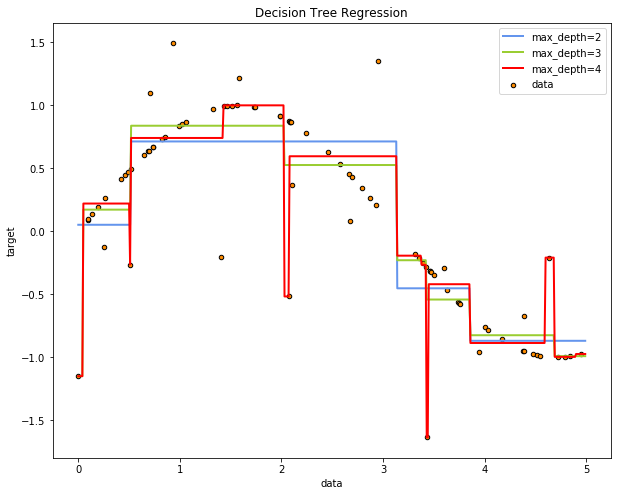

In [60]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')
plt.plot(X_test, y_1, color='cornflowerblue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='yellowgreen', label='max_depth=3', linewidth=2)
plt.plot(X_test, y_3, color='red', label='max_depth=4', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [61]:
# 在训练集上看起来regr3表现最好，其实regr3已经过拟合了
print(regr1.score(X, y))
print(regr2.score(X, y))
# 在测试集上regr2表现最好print(regr3.score(X, y)) 

0.7629899797432984
0.8288157322356544


In [62]:
# 在测试集上regr2表现最好
X_test = np.sort(5*rng.rand(20, 1), axis=0) # rng.rand生成给定形状的随机数，这里（80，1）是一个二维数组，80行，1列
y_test = np.sin(X_test).ravel() # 扁平化

print(regr1.score(X_test, y_test))
print(regr2.score(X_test, y_test)) 
print(regr3.score(X_test, y_test)) 

0.8374850559003532
0.7599486866462462
0.6310698060303424


#### Multi-output 多列输出问题

In [63]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0) # 数值在-100~100之间
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T # [pi*sinx, pi*cosx]
y[::5, :] += (0.5 - rng.rand(20, 2))

In [64]:
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_pred = regr.predict(X_test) # max_depth=4,最多有16个点

In [66]:
y_pred

array([[ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       ...,
       [-0.56245069,  0.46541934],
       [-0.56245069,  0.46541934],
       [-0.56245069,  0.46541934]])

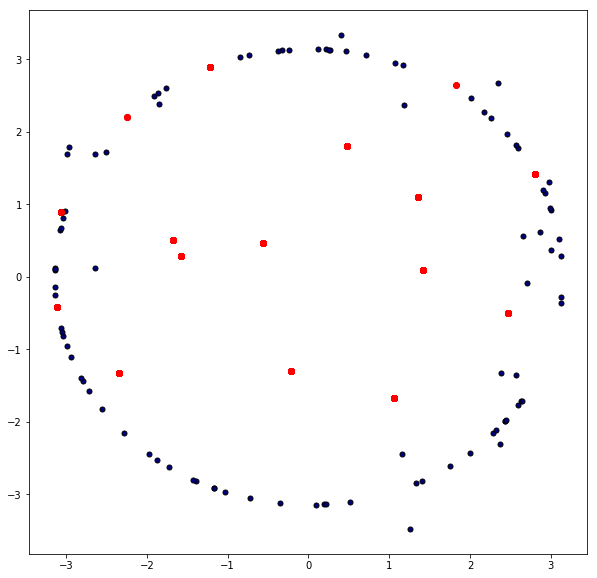

In [67]:
plt.figure(figsize=(10,10))
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_pred[:, 0], y_pred[:, 1], c="red", s=s,
            edgecolor="red", label="max_depth=4")

In [68]:
dot_data = export_graphviz(regr, out_file=None)
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 16.494\\nmse = 4.9\\nsamples = 100\\nvalue = [[0.021]\\n[0.091]]"] ;\n1 [label="X[0] <= -44.963\\nmse = 4.71\\nsamples = 59\\nvalue = [[0.282]\\n[-0.417]]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= -97.884\\nmse = 4.646\\nsamples = 29\\nvalue = [[-0.416]\\n[-0.631]]"] ;\n1 -> 2 ;\n3 [label="X[0] <= -99.702\\nmse = 0.311\\nsamples = 2\\nvalue = [[2.316]\\n[2.028]]"] ;\n2 -> 3 ;\n4 [label="mse = 0.0\\nsamples = 1\\nvalue = [[1.826]\\n[2.645]]"] ;\n3 -> 4 ;\n5 [label="mse = 0.0\\nsamples = 1\\nvalue = [[2.807]\\n[1.411]]"] ;\n3 -> 5 ;\n6 [label="X[0] <= -80.931\\nmse = 4.389\\nsamples = 27\\nvalue = [[-0.619]\\n[-0.828]]"] ;\n2 -> 6 ;\n7 [label="mse = 3.501\\nsamples = 8\\nvalue = [[-1.577]\\n[0.288]]"] ;\n6 -> 7 ;\n8 [label="mse = 4.116\\nsamples = 19\\nvalue = [[-0.215]\\n[-1.298]]"] ;\n6 -> 8 ;\n9 [label="X[0] <= -17.781\\nmse = 4.265\\nsamples = 30\\nvalue = [[0.957]\\n[-0.211]]"] ;\n1 ->

In [69]:
graph = graphviz.Source(dot_data)
graph.render("multiouput") # multiouput.pdf到本地目录

'multiouput.pdf'